In [40]:
import pandas as pd
import matplotlib.pyplot as plt

In [41]:


# Read the CSV file into a DataFrame, skipping metadata rows
worldbank_all_df = pd.read_csv('data/World_Bank/GDP_1960_2023.csv', encoding='utf-8')

# Print the column names to identify the exact names
print(worldbank_all_df.columns)

Index(['Country Name', 'Country Code', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023', 'Unnamed: 66'],
      dtype='object')


In [42]:
worldbank_all_df = worldbank_all_df.drop(columns=['Unnamed: 66'])

In [43]:
worldbank_all_df.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09,NaN
1,Africa Eastern and Southern,AFE,2.121696e+10,2.230747e+10,2.370247e+10,2.577938e+10,2.804954e+10,3.037491e+10,3.304916e+10,3.593376e+10,...,9.796897e+11,8.992957e+11,8.298300e+11,9.401055e+11,1.012719e+12,1.006527e+12,9.290741e+11,1.086772e+12,1.183962e+12,1.236163e+12
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.049713e+10,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,1.450216e+10,NaN
3,Africa Western and Central,AFW,1.188413e+10,1.268566e+10,1.360683e+10,1.443998e+10,1.576911e+10,1.693448e+10,1.804804e+10,1.649577e+10,...,8.945854e+11,7.693673e+11,6.921811e+11,6.857502e+11,7.681896e+11,8.239336e+11,7.871467e+11,8.459930e+11,8.771408e+11,7.965862e+11
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.359668e+11,9.049642e+10,5.276162e+10,7.369015e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.043997e+11,8.472296e+10


In [44]:
# Convert all GDP columns to numeric, forcing errors to null
for col in worldbank_all_df.columns[2:]:
    worldbank_all_df[col] = pd.to_numeric(worldbank_all_df[col], errors='coerce')

# Convert GDP values to millions
for col in worldbank_all_df.columns[2:]:
    worldbank_all_df[col] = worldbank_all_df[col] / 1e6

In [45]:
# Format the numeric columns
worldbank_all_df.iloc[:, 2:] = worldbank_all_df.iloc[:, 2:].applymap(lambda x: f"{x:.2f}M" if pd.notna(x) else "NaN")

/var/folders/0v/k5cxfnrj4_x27cyj9ynqp8qh0000gn/T/ipykernel_8024/2653042215.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  worldbank_all_df.iloc[:, 2:] = worldbank_all_df.iloc[:, 2:].applymap(lambda x: f"{x:.2f}M" if pd.notna(x) else "NaN")
/var/folders/0v/k5cxfnrj4_x27cyj9ynqp8qh0000gn/T/ipykernel_8024/2653042215.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0            NaN
1      21216.96M
2            NaN
3      11884.13M
4            NaN
         ...    
261          NaN
262          NaN
263     8748.60M
264      713.00M
265     1052.99M
Name: 1960, Length: 266, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  worldbank_all_df.iloc[:, 2:] = worldbank_all_df.iloc[:, 2:].applymap(lambda x: f"{x:.2f}M" if pd.notna(x) else "NaN")
/var/folders/0v/k5cxfnrj4_x27cyj9ynqp8qh0000gn/T/ipykernel_8024/2653042215.py:2: F

In [46]:
worldbank_all_df.columns = ['Country Name', 'Country Code'] + [str(year) for year in range(1960, 2024)]

In [47]:
print(worldbank_all_df.head())

                  Country Name Country Code       1960       1961       1962  \
0                        Aruba          ABW        NaN        NaN        NaN   
1  Africa Eastern and Southern          AFE  21216.96M  22307.47M  23702.47M   
2                  Afghanistan          AFG        NaN        NaN        NaN   
3   Africa Western and Central          AFW  11884.13M  12685.66M  13606.83M   
4                       Angola          AGO        NaN        NaN        NaN   

        1963       1964       1965       1966       1967  ...        2014  \
0        NaN        NaN        NaN        NaN        NaN  ...    2790.85M   
1  25779.38M  28049.54M  30374.91M  33049.16M  35933.76M  ...  979689.66M   
2        NaN        NaN        NaN        NaN        NaN  ...   20497.13M   
3  14439.98M  15769.11M  16934.48M  18048.04M  16495.77M  ...  894585.44M   
4        NaN        NaN        NaN        NaN        NaN  ...  135966.80M   

         2015        2016        2017         2018      

In [48]:
# Remove the 'M' suffix and convert to numeric
# Skip the first two columns (Country Name and Country Code)
for column in worldbank_all_df.columns[2:]:  
    worldbank_all_df[column] = worldbank_all_df[column].replace({',': ''}, regex=True)  

# Remove commas if any
    worldbank_all_df[column] = pd.to_numeric(worldbank_all_df[column].str.replace('M', ''), errors='coerce')

In [49]:
# Calculate the average for each country
worldbank_all_df['Average'] = worldbank_all_df.iloc[:, 2:].mean(axis=1).round(2)

worldbank_all_df.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Average
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2962.91,2983.64,3092.43,3276.18,3395.80,2558.91,3103.18,3544.71,NaN,2048.89
1,Africa Eastern and Southern,AFE,21216.96,22307.47,23702.47,25779.38,28049.54,30374.91,33049.16,35933.76,...,899295.68,829829.96,940105.48,1012719.34,1006527.29,929074.09,1086772.16,1183962.13,1236163.04,376676.48
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19134.22,18116.57,18753.46,18053.22,18799.44,19955.93,14266.50,14502.16,NaN,13093.44
3,Africa Western and Central,AFW,11884.13,12685.66,13606.83,14439.98,15769.11,16934.48,18048.04,16495.77,...,769367.32,692181.09,685750.16,768189.59,823933.63,787146.72,845993.05,877140.81,796586.16,279521.42
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90496.42,52761.62,73690.15,79450.69,70897.96,48501.56,66505.13,104399.75,84722.96,54654.05


In [50]:
#create clean data file
worldbank_all_df.to_csv('data/World_Bank/World_Bank_GDP_Cleaned.csv', index=False)


In [51]:
#create plotting data frame
plotting_GDP = worldbank_all_df.drop(columns=['Average', 'Country Code'])
plotting_GDP.set_index('Country Name', inplace=True)


In [52]:
#Transpose DataFrame to have years as x and countries as y and create fig size
plotting_GDP = plotting_GDP.T

plt.figure(figsize=(14, 8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

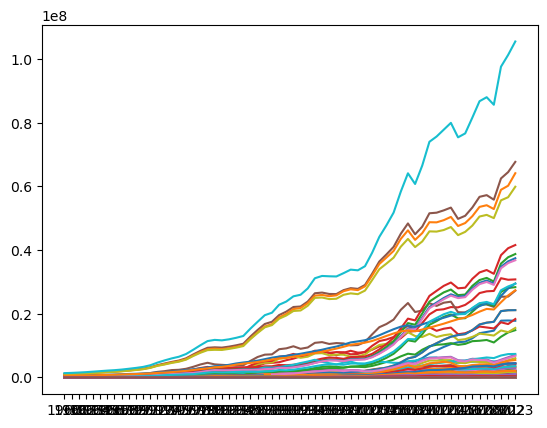

In [53]:

# Plot each country's GDP
for country in plotting_GDP.columns:
    plt.plot(plotting_GDP.index, plotting_GDP[country], label=country)

In [54]:
worldbank_all_df.columns

Index(['Country Name', 'Country Code', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023', 'Average'],
      dtype='object')

In [55]:
wb_country_3_letter_code = worldbank_all_df['Country Code']
wb_country_name = worldbank_all_df['Country Name']


In [56]:
wb_country_3_letter_code

0      ABW
1      AFE
2      AFG
3      AFW
4      AGO
      ... 
261    XKX
262    YEM
263    ZAF
264    ZMB
265    ZWE
Name: Country Code, Length: 266, dtype: object

In [57]:
wb_country_name

0                            Aruba
1      Africa Eastern and Southern
2                      Afghanistan
3       Africa Western and Central
4                           Angola
                  ...             
261                         Kosovo
262                    Yemen, Rep.
263                   South Africa
264                         Zambia
265                       Zimbabwe
Name: Country Name, Length: 266, dtype: object